AI method to perform counting and masking

We utlize a zero shot segmentation method called MobileSAM by good for masking and counting. Use of MobileSAM ensures robust and highly efficient masking, with the use of lower resources compared to its parent SAM archtiecture. Since it is zero shot, it avoids the time curve and development cycle of creating and labelling datasets for the same. It also provides a option of further enhancement using image prompts.



In [2]:
# Use this link to download the weights of mobile SAM
#https://github.com/ChaoningZhang/MobileSAM/blob/master/weights/mobile_sam.pt  mobile sam weights

  Cloning https://github.com/ChaoningZhang/MobileSAM.git to c:\users\karth\appdata\local\temp\pip-req-build-5fchbjjf
  Resolved https://github.com/ChaoningZhang/MobileSAM.git to commit c12dd83cbe26dffdcc6a0f9e7be2f6fb024df0ed
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/ChaoningZhang/MobileSAM.git 'C:\Users\karth\AppData\Local\Temp\pip-req-build-5fchbjjf'

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import sys

## Set-up

In [4]:
#all libraries
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [5]:

#displaying images with annotations

def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

In [10]:
#input image using cv2 
image = cv2.imread('11.jpg') #set proper path
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

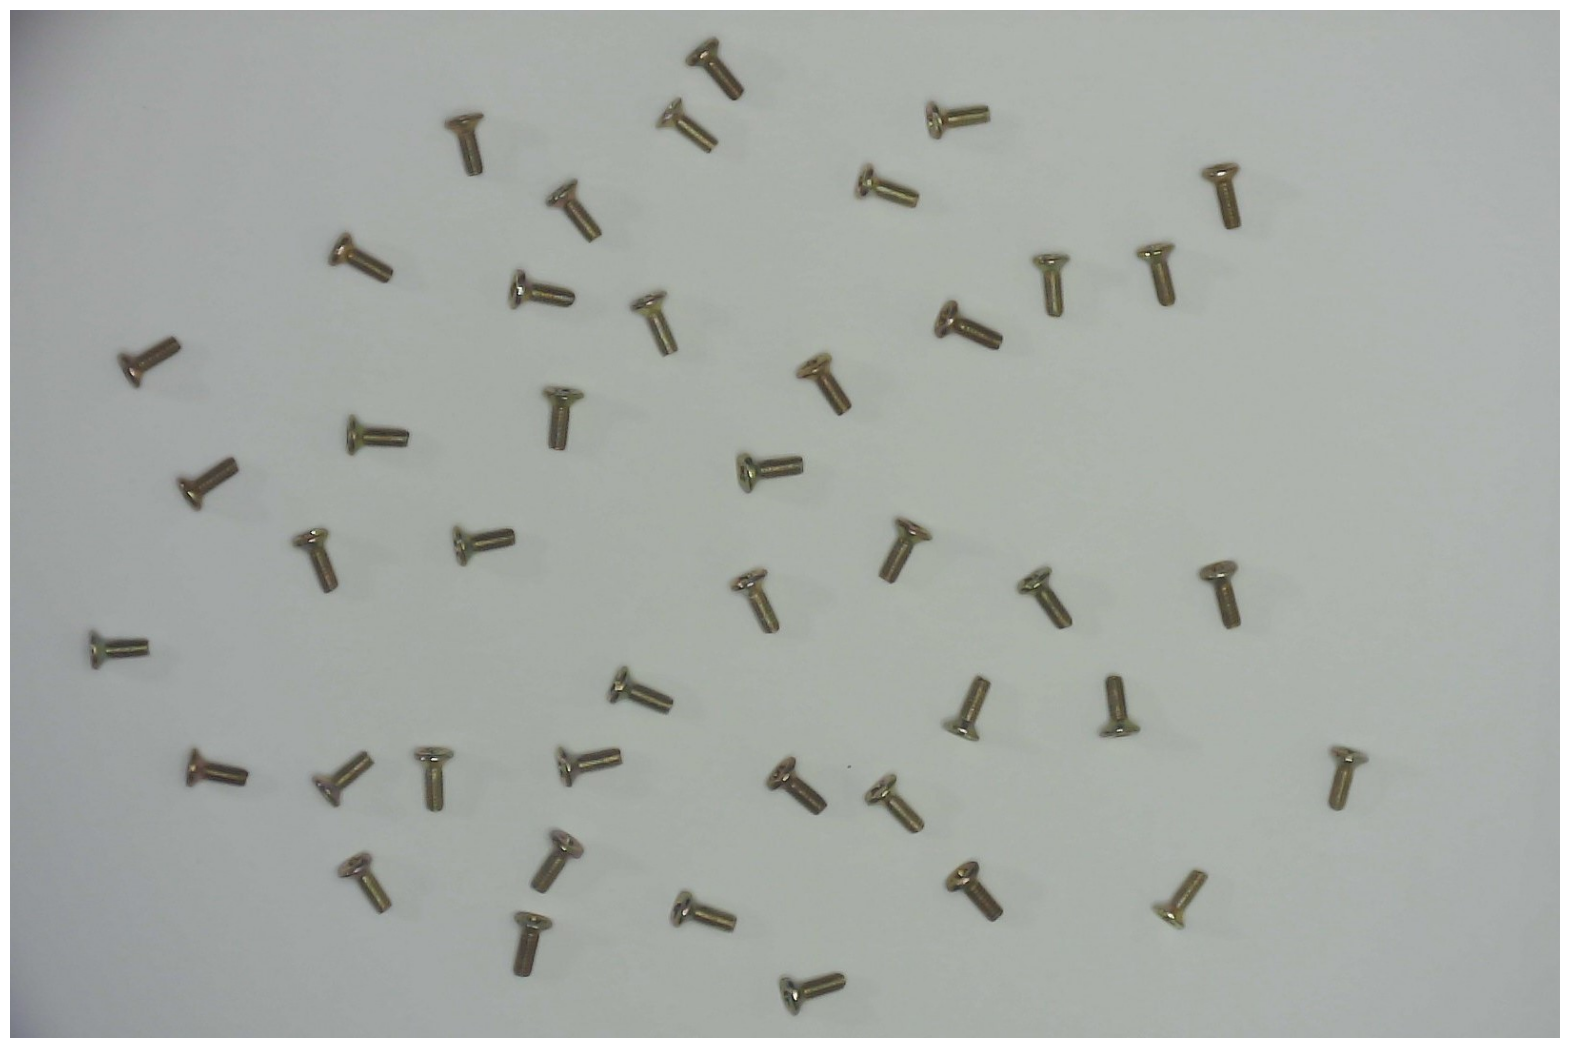

In [11]:
plt.figure(figsize=(20,20))
plt.imshow(image)
plt.axis('off')
plt.show()

In [15]:
import sys
sys.path.append("..")
from mobile_sam import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

#set suitable model and checkpoint
sam_checkpoint = "mobile_sam.pt"  #set proper path of download
model_type = "vit_t"   

device = "cpu" #if torch.cuda.is_available() else "cpu"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)
sam.eval()

#automaticMaskGenerator intitializes all parameters by itself
mask_generator = SamAutomaticMaskGenerator(sam)

In [16]:
#Use .generate() to create masks based on the set parameters
masks = mask_generator.generate(image)

In [17]:
#prints number of objects-in this case screws and bolts
print("Number of objects are ",len(masks))


Number of objects are  45


Show all the masks overlayed on the image.

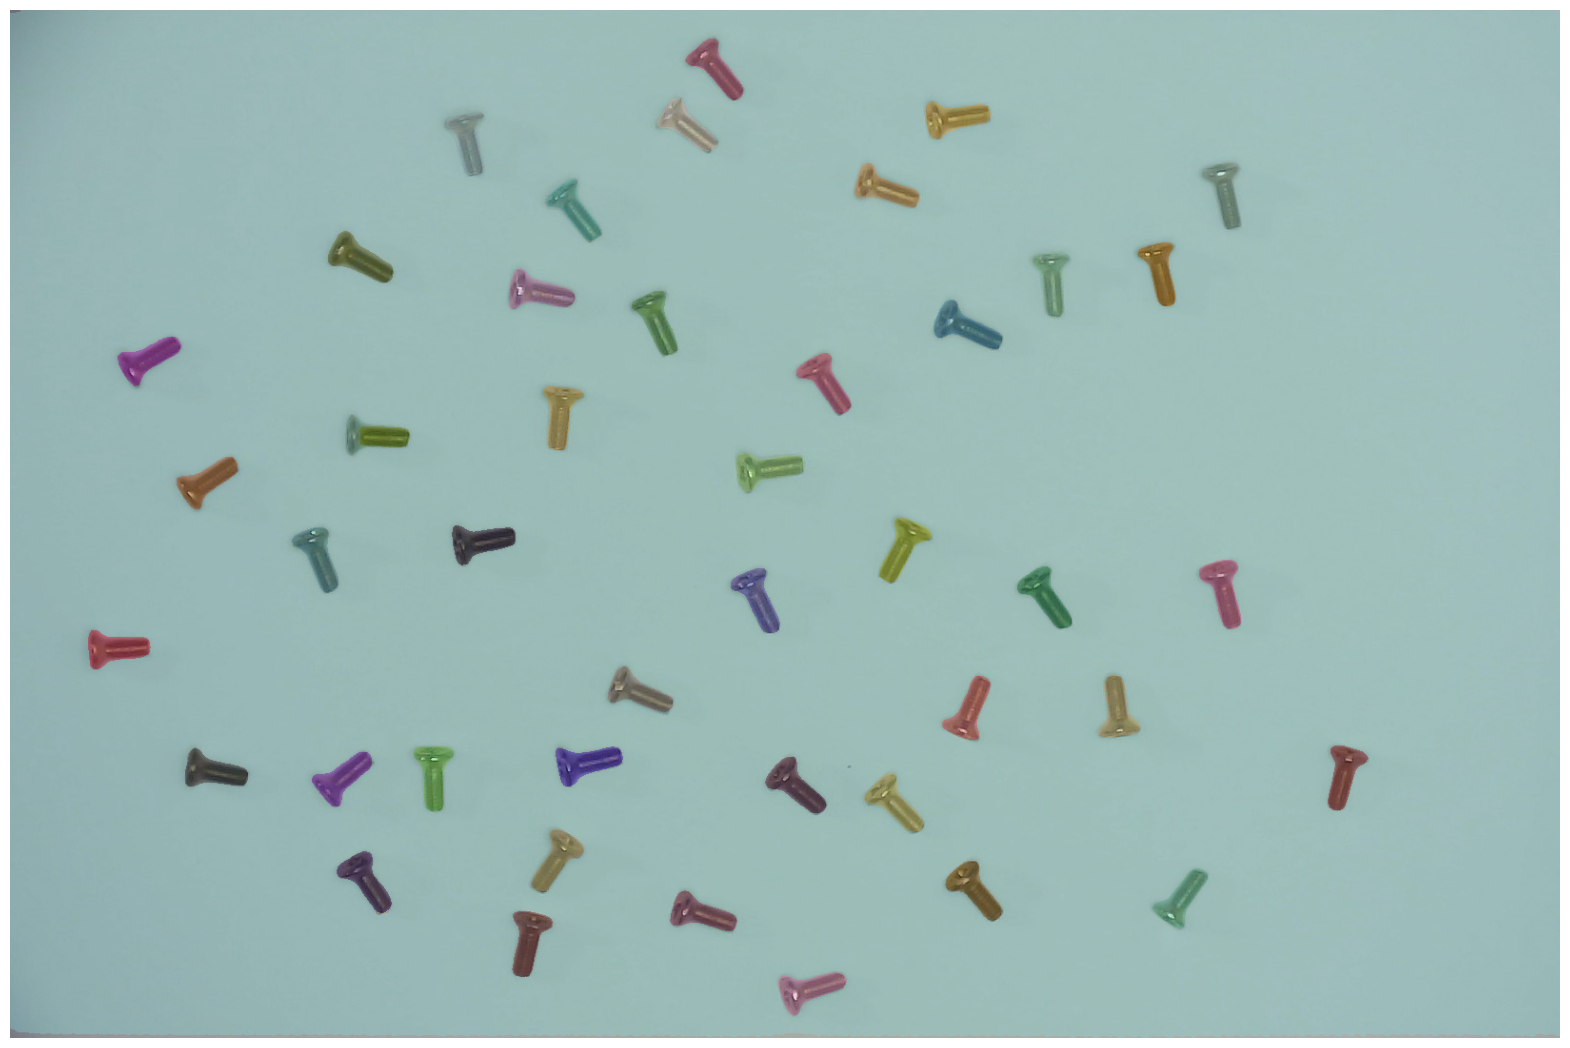

In [18]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show() 